<a href="https://colab.research.google.com/github/PaulToronto/TensorFlow_Tutorials/blob/main/2_Keras_Basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras - Basic image classification

## Imports

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.17.0'

## The Fashion MNIST dataset

This dataset contains contains 70,000 grayscale images in 10 categories. It is very similar to the MNIST dataset.

In [3]:
# load the data
fashion_mnist = tf.keras.datasets.fashion_mnist

test = fashion_mnist.load_data()

In [4]:
type(test), len(test), len(test[0]), len(test[1])

(tuple, 2, 2, 2)

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
labels = np.unique(train_labels)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Visualize Fashion MNIST

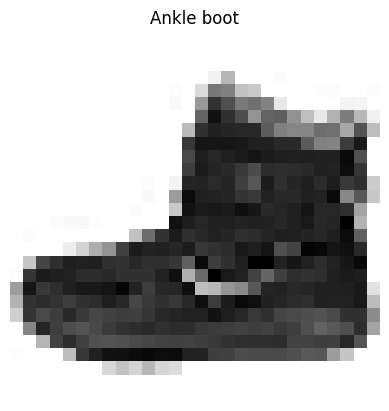

In [8]:
def plot_fashion(image_data, label_data):
    image = image_data
    plt.imshow(image, cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[label_data])

plot_fashion(train_images[0], train_labels[0])

In [9]:
len(train_images[:50])

50

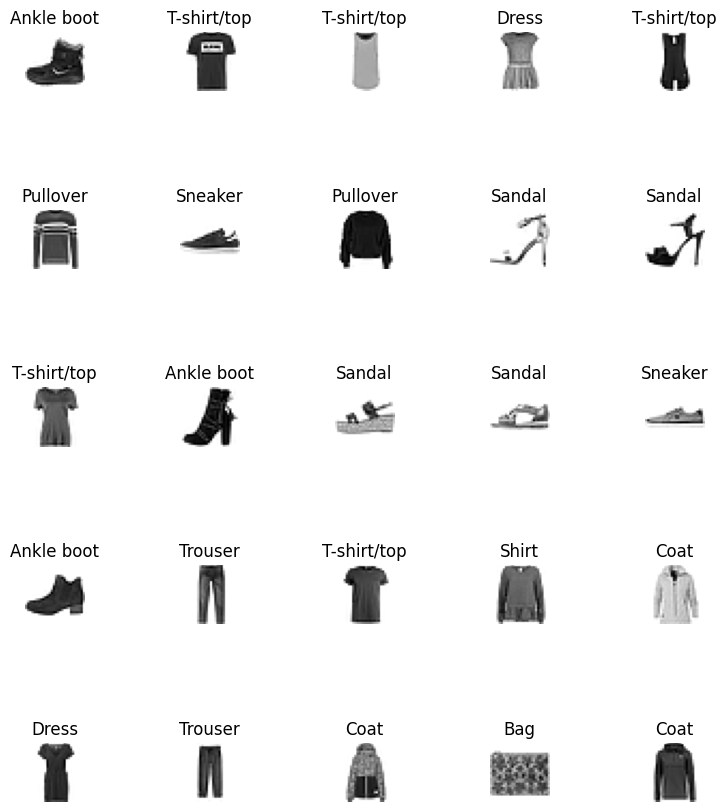

In [10]:
plt.figure(figsize=(10, 10))
for index, image_data in enumerate(train_images[:25]):
    plt.subplot(5, 5, index+1)
    plot_fashion(image_data, train_labels[index])

plt.subplots_adjust(wspace=0, hspace=2)

## Preprocess the data

The pixels values fall in the range of 0 to 255. These should be scaled before feeding them to the neural network model

In [11]:
train_images.min(), train_images.max(), test_images.min(), test_images.max()

(0, 255, 0, 255)

In [12]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
train_images.min(), train_images.max(), test_images.min(), test_images.max()

(0.0, 1.0, 0.0, 1.0)

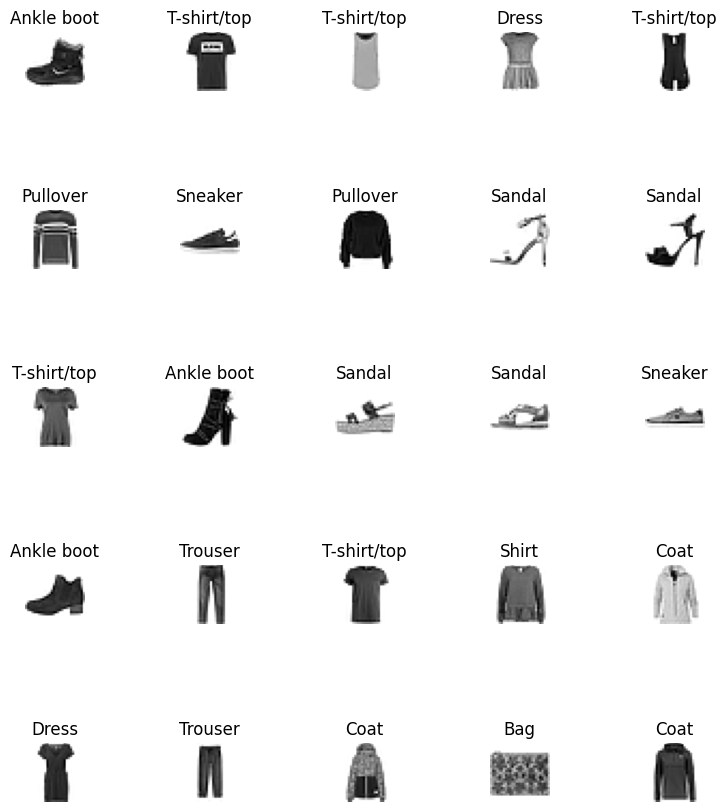

In [14]:
# data viz still works
plt.figure(figsize=(10, 10))
for index, image_data in enumerate(train_images[:25]):
    plt.subplot(5, 5, index+1)
    plot_fashion(image_data, train_labels[index])

plt.subplots_adjust(wspace=0, hspace=2)

## Build the model

### Set up the layers

The tutorial uses the following code, but it generates a warning. My code below gets rid of that warning.

```python
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# UserWarning: Do not pass an `input_shape`/`input_dim` argument to
#.  a layer. When using Sequential models, prefer using an
#. `Input (shape)` object as the first layer in the model instead.
```

In [21]:
model = tf.keras.models.Sequential([

    # input layer has a node for each feature, 784 nodes
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),

    # hidden layer
    tf.keras.layers.Dense(128, activation='relu'),

    # output layer has a node for each class
    tf.keras.layers.Dense(10)
])

model

<Sequential name=sequential_3, built=True>

In [23]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>]

- The first layer in this network